# Québec Emergency Rooms Situations Data Analysis

This project aims to analyze the latest data regarding **Emergency Rooms (ER) Situations** in **Québec**. 

In this project, I have scraped the lastest data from: <br>
> - [Gouvernment du Québec](https://www.quebec.ca/en/health/health-system-and-services/service-organization/quebec-health-system-and-its-services/situation-in-emergency-rooms-in-quebec)

## Questions
1. Top 5 Hospitals with Shortest Estimated Emergergy Wait Time (Non-Priority Cases) in Montreal
2. Top 5 Hospitals with Shortest Average Emergergy Wait Time in Montreal
3. Is there shortage of stretchers among hospitals in Montreal?
4. Overall Pictures Showing Estimated Emergency Wait Time of Hospitals Across Quebec
5. Does Montreal have the shortest average estimated emergency wait time among all regions in Quebec?

## Notebook Content

1. **Step 1**: Install + Import Necessary Libraries
2. **Step 2**: Web Scraping
3. **Step 3**: Exploring Data
4. **Step 4**: Data Cleaning + Prepocessing
5. **Step 5**: Data Analysis + Visualization
6. **Step 6**: Data Analysis Result

## Step 1: Install + Import Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Web Scraping

In [8]:
# Extracting data from Quebec Government website.
base_url = "https://www.quebec.ca/en/health/health-system-and-services/service-organization/quebec-health-system-and-its-services/situation-in-emergency-rooms-in-quebec?id=24981&tx_solr%5Blocation%5D=&tx_solr%5Bpt%5D=&tx_solr%5Bsfield%5D=geolocation_location&tx_solr%5Bpage%5D="

# Create lists to store scraped data

li0_name = [] # name
li0_address = [] # address
li0_region = [] # region

li1 = [] # wt_nonpri - Estimated waiting time for non-priority cases to see a doctor
li2 = [] # pp_dr - Number of people waiting to see a doctor in the emergency room
li3 = [] # pp_em - Total number of people in the emergency room
li4 = [] # or_str - Occupancy rate of stretchers:
li5 = [] # avr_wt_wrm - Average time in the waiting room (from the previous day):
li6 = [] # avr_wt_str - Average waiting time on a stretcher (from the previous day)


# Loop through all 12 pages

for page in range(1,13):
    
    url = f"{base_url}{page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    hospitals = soup.find_all('ul', {'class':'hospital-info'}) 

    # On each page, there are ten hospitals. loop through each hospital and scrape data
    for hospital in hospitals[0:10]:
        
        # On each hospital, there is an unordered list comprising seven items <li>
        # On the first <li> item
        li0_name.append(hospital.find('div', class_="font-weight-bold").text.strip())
        
        if hospital.find('div',class_="adresse"):
            li0_address.append(hospital.find('div', class_="adresse").get_text(" ", strip=True))
        else:
            li0_address.append(None)
        
        if hospital.find('div',class_="adresse"):
            li0_region.append(hospital.find('div',class_="adresse").find('br').next_sibling.strip())
        else:
            li0_region.append(None)
    
        # From second to seventh <li> items
        li1.append(hospital.find_all('li')[1].find('span', class_='font-weight-bold').text.strip())
        li2.append(hospital.find_all('li')[2].find('span', class_='font-weight-bold').text.strip())
        li3.append(hospital.find_all('li')[3].find('span', class_='font-weight-bold').text.strip())
        li4.append(hospital.find_all('li')[4].find('span', class_='font-weight-bold').text.strip())
        li5.append(hospital.find_all('li')[5].find('span', class_='font-weight-bold').text.strip())
        li6.append(hospital.find_all('li')[5].find('span', class_='font-weight-bold').text.strip())


#### Save data into a Dictionary and convert it into a DataFrame

In [10]:
# Convert the newly created lists into dictionary
dict = {'name':li0_name, 
        'address':li0_address, 
        'region':li0_region, 
        'wt_nonpri':li1, 
        'pp_dr':li2,
        'pp_em':li3,
        'or_str':li4,
        'avr_wt_wrm':li5,
        'avr_wt_str':li6
       }

In [11]:
# Convert the dictionary into dataframe
df = pd.DataFrame(dict)
df.head()

,name,address,region,wt_nonpri,pp_dr,pp_em,or_str,avr_wt_wrm,avr_wt_str
0,Centre de santé et de services sociaux du Granit,"3569 rue Laval, Lac-Mégantic, G6B 1A5 Estrie",Estrie,01:32,2,3,0%,2:25,2:25
1,Centre hospitalier de l'Université de Montréal,"1000 rue Saint-Denis, Montréal, H2X 0A9 Montréal",Montréal,12:04,51,113,114%,7:17,7:17
2,Centre hospitalier de l'Université Laval,"2705 boulevard Laurier, Québec, G1V 4G2 Capita...",Capitale-Nationale,06:31,31,79,100%,5:16,5:16
3,Centre hospitalier de St.Mary,"3830 avenue Lacombe, Montréal, H3T 1M5 Montréal",Montréal,04:12,6,36,114%,4:27,4:27
4,Centre hospitalier régional du Grand-Portage,"75 rue Saint-Henri, Rivière-du-Loup, G5R 2A4 B...",Bas-Saint-Laurent,01:07,1,7,56%,3:22,3:22


## Step 3: Reading and Exploraing Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        116 non-null    object
 1   address     115 non-null    object
 2   region      115 non-null    object
 3   wt_nonpri   116 non-null    object
 4   pp_dr       116 non-null    object
 5   pp_em       116 non-null    object
 6   or_str      116 non-null    object
 7   avr_wt_wrm  116 non-null    object
 8   avr_wt_str  116 non-null    object
dtypes: object(9)
memory usage: 8.3+ KB


In [14]:
df.tail()

,name,address,region,wt_nonpri,pp_dr,pp_em,or_str,avr_wt_wrm,avr_wt_str
111,Hôpital de soins psychiatriques de l'Est-de-Mo...,"7401 rue Hochelaga, Montréal, H1N 3M5 Montréal",Montréal,currently not available,0,9,75%,2:17,2:17
112,L'Hôpital de Montréal pour enfants,"1001 boulevard Décarie, Montréal, H4A 3J1 Mont...",Montréal,04:25,19,32,92%,4:19,4:19
113,L'Hôtel-Dieu de Québec,"11 Côte du Palais, Québec, G1R 2J6 Capitale-Na...",Capitale-Nationale,02:47,5,20,100%,3:54,3:54
114,Pavillon Sainte-Marie,"1991 boulevard du Carmel, Trois-Rivières, G8Z ...",Mauricie et Centre-du-Québec,09:48,31,72,113%,5:19,5:19
115,Ensemble du Québec,None,None,currently not available,"1,372","3,700",105%,5:15,5:15


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        116 non-null    object
 1   address     115 non-null    object
 2   region      115 non-null    object
 3   wt_nonpri   116 non-null    object
 4   pp_dr       116 non-null    object
 5   pp_em       116 non-null    object
 6   or_str      116 non-null    object
 7   avr_wt_wrm  116 non-null    object
 8   avr_wt_str  116 non-null    object
dtypes: object(9)
memory usage: 8.3+ KB


## Step 4: Data Cleanning + Preprocessing

#### Drop the unwanted data

In [18]:
# Drop the unwanted data (the last row is redundant.)
df.drop(index=df.index[-1],axis=0,inplace=True)

#### Convert datatypes into desirable format

In [20]:
# Convert data into desirable type

df[['pp_dr']] = df[['pp_dr']].astype(int)
df[['pp_em']] = df[['pp_em']].astype(int)

#### Convert time string objects into numerical data + desirable format

In [22]:
# Convert "hh:mm" to total minutes
def timeconvert(str):
    if str != 'currently not available':
        hours, minutes = map(int, str.split(':'))
        total_minutes = int(hours*60 + minutes)
        return total_minutes
    else:
        return None

df['wt_nonpri'] = df['wt_nonpri'].apply(timeconvert)
df['avr_wt_wrm']= df['avr_wt_wrm'].apply(timeconvert)
df['avr_wt_str']= df['avr_wt_str'].apply(timeconvert)

df

,name,address,region,wt_nonpri,pp_dr,pp_em,or_str,avr_wt_wrm,avr_wt_str
0,Centre de santé et de services sociaux du Granit,"3569 rue Laval, Lac-Mégantic, G6B 1A5 Estrie",Estrie,92.0,2,3,0%,145,145
1,Centre hospitalier de l'Université de Montréal,"1000 rue Saint-Denis, Montréal, H2X 0A9 Montréal",Montréal,724.0,51,113,114%,437,437
2,Centre hospitalier de l'Université Laval,"2705 boulevard Laurier, Québec, G1V 4G2 Capita...",Capitale-Nationale,391.0,31,79,100%,316,316
3,Centre hospitalier de St.Mary,"3830 avenue Lacombe, Montréal, H3T 1M5 Montréal",Montréal,252.0,6,36,114%,267,267
4,Centre hospitalier régional du Grand-Portage,"75 rue Saint-Henri, Rivière-du-Loup, G5R 2A4 B...",Bas-Saint-Laurent,67.0,1,7,56%,202,202
...,...,...,...,...,...,...,...,...,...
110,Institut universitaire de cardiologie et de pn...,"2725 chemin Sainte-Foy, Québec, G1V 4G5 Capita...",Capitale-Nationale,299.0,8,30,120%,272,272
111,Hôpital de soins psychiatriques de l'Est-de-Mo...,"7401 rue Hochelaga, Montréal, H1N 3M5 Montréal",Montréal,NaN,0,9,75%,137,137
112,L'Hôpital de Montréal pour enfants,"1001 boulevard Décarie, Montréal, H4A 3J1 Mont...",Montréal,265.0,19,32,92%,259,259
113,L'Hôtel-Dieu de Québec,"11 Côte du Palais, Québec, G1R 2J6 Capitale-Na...",Capitale-Nationale,167.0,5,20,100%,234,234


In [23]:
df['wt_nonpri'].unique()

array([ 92., 724., 391., 252.,  67., 335.,  nan, 337., 297., 197., 238.,
       105.,  53.,  71., 140.,  89.,  59.,  64., 296.,  98.,  72., 178.,
        69.,  77.,  66., 253., 472., 561.,  70.,  95., 287., 426., 305.,
       492., 611., 209., 189.,  55.,  73., 236.,  52.,  57., 691., 600.,
       650.,  65., 333., 131., 595., 351., 519., 234.,  74., 130., 224.,
        54., 336., 608., 400., 565., 386., 265.,  83., 444., 478., 419.,
       134.,  61., 142., 121., 350.,  88., 204., 147., 255., 428., 417.,
       454., 465., 442., 211., 593., 621., 665., 389., 377., 421., 439.,
       208., 511., 240., 299., 167., 588.])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        115 non-null    object 
 1   address     115 non-null    object 
 2   region      115 non-null    object 
 3   wt_nonpri   106 non-null    float64
 4   pp_dr       115 non-null    int64  
 5   pp_em       115 non-null    int64  
 6   or_str      115 non-null    object 
 7   avr_wt_wrm  115 non-null    int64  
 8   avr_wt_str  115 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 8.2+ KB


#### For colomn 'or_str' Remove ' % ' and convert the string into numerical data

In [26]:
df['or_str'].unique()

array(['0%', '114%', '100%', '56%', '200%', '83%', '113%', '50%', '20%',
       '118%', '40%', '14%', '25%', '33%', '80%', '133%', '29%',
       'not applicable', '63%', '107%', '82%', '156%', '160%', '119%',
       '72%', '41%', '57%', '66%', '125%', '95%', '124%', '115%', '71%',
       '161%', '157%', '138%', '167%', '117%', '60%', '146%', '90%',
       '181%', '140%', '45%', '158%', '111%', '103%', '106%', '38%',
       '22%', '67%', '110%', '70%', '144%', '155%', '77%', '109%', '43%',
       '102%', '132%', '176%', '42%', '108%', '91%', '141%', '32%',
       '120%', '75%', '92%'], dtype=object)

In [27]:
# Drop the rows containing ('not applicable')

df.replace('not applicable',pd.NA , inplace=True)

In [28]:
df['or_str'].unique()

array(['0%', '114%', '100%', '56%', '200%', '83%', '113%', '50%', '20%',
       '118%', '40%', '14%', '25%', '33%', '80%', '133%', '29%', <NA>,
       '63%', '107%', '82%', '156%', '160%', '119%', '72%', '41%', '57%',
       '66%', '125%', '95%', '124%', '115%', '71%', '161%', '157%',
       '138%', '167%', '117%', '60%', '146%', '90%', '181%', '140%',
       '45%', '158%', '111%', '103%', '106%', '38%', '22%', '67%', '110%',
       '70%', '144%', '155%', '77%', '109%', '43%', '102%', '132%',
       '176%', '42%', '108%', '91%', '141%', '32%', '120%', '75%', '92%'],
      dtype=object)

In [29]:
df['or_str'] = pd.to_numeric(df['or_str'].str.replace('%', '', regex=False), errors='coerce').astype('Int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        115 non-null    object 
 1   address     115 non-null    object 
 2   region      115 non-null    object 
 3   wt_nonpri   106 non-null    float64
 4   pp_dr       115 non-null    int64  
 5   pp_em       115 non-null    int64  
 6   or_str      114 non-null    Int64  
 7   avr_wt_wrm  115 non-null    int64  
 8   avr_wt_str  115 non-null    int64  
dtypes: Int64(1), float64(1), int64(4), object(3)
memory usage: 8.3+ KB


#### Drop unwanted rows containing null values

In [32]:
df = df.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 114
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        106 non-null    object 
 1   address     106 non-null    object 
 2   region      106 non-null    object 
 3   wt_nonpri   106 non-null    float64
 4   pp_dr       106 non-null    int64  
 5   pp_em       106 non-null    int64  
 6   or_str      106 non-null    Int64  
 7   avr_wt_wrm  106 non-null    int64  
 8   avr_wt_str  106 non-null    int64  
dtypes: Int64(1), float64(1), int64(4), object(3)
memory usage: 8.4+ KB


In [34]:
df.describe()

,wt_nonpri,pp_dr,pp_em,or_str,avr_wt_wrm,avr_wt_str
count,106.000000,106.000000,106.000000,106.0,106.000000,106.000000
mean,274.735849,12.764151,34.518868,85.698113,296.245283,296.245283
std,192.597053,14.010576,33.587762,50.144585,108.476094,108.476094
min,52.000000,0.000000,0.000000,0.0,63.000000,63.000000
25%,84.250000,1.000000,7.250000,46.25,227.000000,227.000000
50%,237.000000,8.000000,23.000000,100.0,292.500000,292.500000
75%,420.500000,19.000000,53.750000,117.0,374.000000,374.000000
max,724.000000,51.000000,130.000000,200.0,564.000000,564.000000


#### Save the dataframe as a csv file

In [36]:
df.to_csv("df_emergency_quebec.csv")

## Step 5: Data Analysis and Visualisation

### Q1: Top 10 Hospitals with Shortest Estimated Emergergy Wait Time (Non-Priority Cases) in Montreal


#### Create a new dataframe showing Montreal hopistals situations

In [40]:
# Create a new dataframe showing hopistals situations in Montreal region
dfmtl = df.where(df['region']=='Montréal')
dfmtl = dfmtl.dropna().reset_index(drop=True)  # drop the existing index and create a new index
dfmtl.head()

,name,address,region,wt_nonpri,pp_dr,pp_em,or_str,avr_wt_wrm,avr_wt_str
0,Centre hospitalier de l'Université de Montréal,"1000 rue Saint-Denis, Montréal, H2X 0A9 Montréal",Montréal,724.0,51.0,113.0,114,437.0,437.0
1,Centre hospitalier de St.Mary,"3830 avenue Lacombe, Montréal, H3T 1M5 Montréal",Montréal,252.0,6.0,36.0,114,267.0,267.0
2,CHU Sainte-Justine,"3175 chemin de la Côte-Sainte-Catherine, Montr...",Montréal,253.0,8.0,26.0,63,333.0,333.0
3,Hôpital de Lachine,"650 16e Avenue, Montréal, H8S 3N5 Montréal",Montréal,351.0,12.0,34.0,157,355.0,355.0
4,Hôpital de LaSalle,"8585 terrasse Champlain, Montréal, H8P 1C1 Mon...",Montréal,234.0,7.0,35.0,167,361.0,361.0


In [41]:
# Create a new DataFrame Using Multiple Columns from Old DataFrame
dfmtl_waittime = dfmtl[['name','avr_wt_wrm','wt_nonpri']].copy()
dfmtl_waittime

,name,avr_wt_wrm,wt_nonpri
0,Centre hospitalier de l'Université de Montréal,437.0,724.0
1,Centre hospitalier de St.Mary,267.0,252.0
2,CHU Sainte-Justine,333.0,253.0
3,Hôpital de Lachine,355.0,351.0
4,Hôpital de LaSalle,361.0,234.0
5,Hôpital de Verdun,284.0,265.0
6,Hôpital Douglas,238.0,83.0
7,Hôpital du Sacré-Cœur de Montréal,483.0,608.0
8,Hôpital en santé mentale Albert-Prévost,241.0,61.0
9,Hôpital Fleury,216.0,419.0


#### Create a function for formatting time label in plots

In [43]:
# create a function that can convert total minutes into HH:MM format
def convert_hhmm(value):
    hours = int(value // 60)
    minutes = int(value % 60)
    return f"{hours:02d}"

#### Sort by estimated wait time (non-priority case) and get the top 10 hospitals

In [45]:
dfmtl_waittime_top_nonpri = dfmtl_waittime.sort_values('wt_nonpri', ascending=True).reset_index(drop=True).head(10)
dfmtl_waittime_top_nonpri

,name,avr_wt_wrm,wt_nonpri
0,Hôpital en santé mentale Albert-Prévost,241.0,61.0
1,Hôpital Douglas,238.0,83.0
2,Hôpital général de Montréal,291.0,147.0
3,Hôpital de LaSalle,361.0,234.0
4,Institut de cardiologie de Montréal,237.0,240.0
5,Centre hospitalier de St.Mary,267.0,252.0
6,CHU Sainte-Justine,333.0,253.0
7,Hôpital général du Lakeshore,376.0,255.0
8,L'Hôpital de Montréal pour enfants,259.0,265.0
9,Hôpital de Verdun,284.0,265.0


#### Visualise

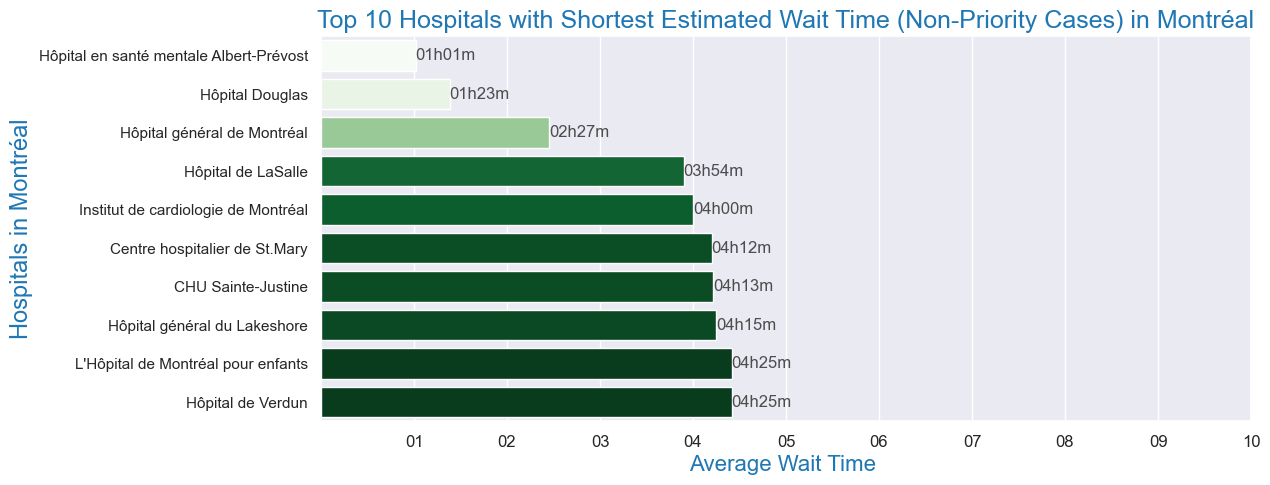

In [47]:
sns.set_theme()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
ax = sns.barplot(dfmtl_waittime_top_nonpri, x="wt_nonpri", y="name", hue="wt_nonpri", palette="Greens")

plt.title("Top 10 Hospitals with Shortest Estimated Wait Time (Non-Priority Cases) in Montréal", fontsize=18, color='tab:blue')
plt.xlabel("Average Wait Time ", fontsize=16, color='tab:blue')
plt.ylabel("Hospitals in Montréal", fontsize=17, color='tab:blue')
plt.yticks(size = 11)
ax.legend_.remove()

xtick_values = np.arange(60, 601, 60) 
xtick_labels = [convert_hhmm(tick) for tick in xtick_values]
plt.xticks(ticks=xtick_values, labels=xtick_labels, size=12)

for container in ax.containers:
    hhmm_lbl = [f'{int(label // 60):02d}h{int(label % 60):02d}m' for label in container.datavalues]
    ax.bar_label(container, labels=hhmm_lbl, fontsize=12, alpha=0.8)

plt.show()

### Q2: Top 10 Hospitals with Shortest Average Emergergy Wait Time in Montreal <br>


#### Sort by average wait time and get the top 10 hospitals

In [50]:
# Sorting and find the Top 10
dfmtl_waittime_top = dfmtl_waittime.sort_values('avr_wt_wrm', ascending=True).reset_index(drop=True).head(10)
dfmtl_waittime_top

,name,avr_wt_wrm,wt_nonpri
0,Hôpital général juif,157.0,428.0
1,Hôpital Jean-Talon,190.0,454.0
2,Hôpital Fleury,216.0,419.0
3,Institut de cardiologie de Montréal,237.0,240.0
4,Hôpital Douglas,238.0,83.0
5,Hôpital en santé mentale Albert-Prévost,241.0,61.0
6,L'Hôpital de Montréal pour enfants,259.0,265.0
7,Centre hospitalier de St.Mary,267.0,252.0
8,Hôpital de Verdun,284.0,265.0
9,Hôpital général de Montréal,291.0,147.0


#### Visualise

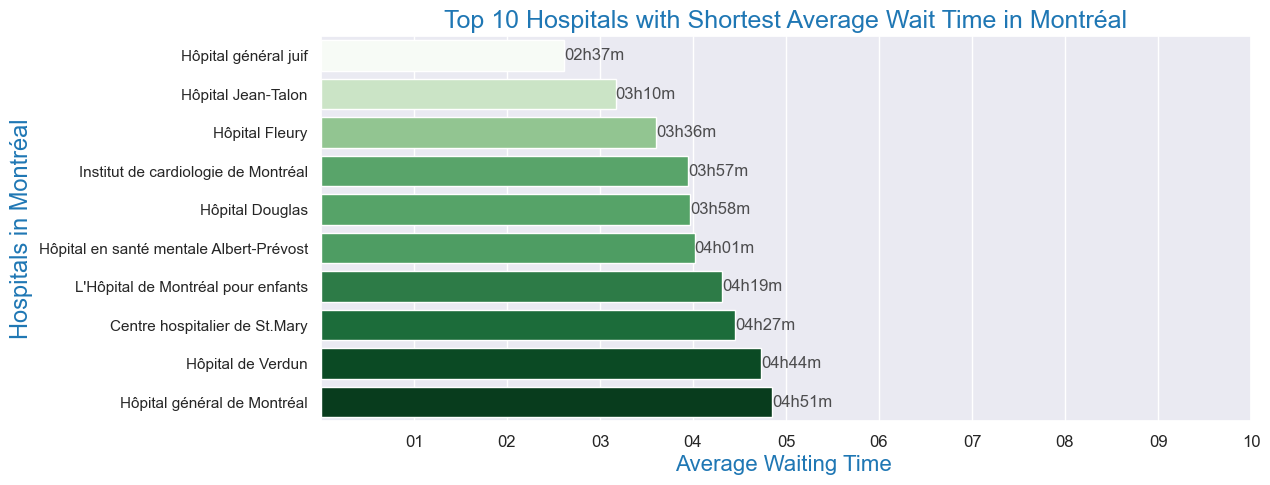

In [52]:
sns.set_theme()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
ax = sns.barplot(dfmtl_waittime_top, x="avr_wt_wrm", y="name", hue="avr_wt_wrm", palette="Greens")

plt.title("Top 10 Hospitals with Shortest Average Wait Time in Montréal", fontsize=18, color='tab:blue')
plt.xlabel("Average Waiting Time ", fontsize=16, color='tab:blue')
plt.ylabel("Hospitals in Montréal", fontsize=17, color='tab:blue')
plt.yticks(size = 11)
ax.legend_.remove()

xtick_values = np.arange(60, 601, 60) 
xtick_labels = [convert_hhmm(tick) for tick in xtick_values]
plt.xticks(ticks=xtick_values, labels=xtick_labels, size=12)

for container in ax.containers:
    hhmm_lbl = [f'{int(label // 60):02d}h{int(label % 60):02d}m' for label in container.datavalues]
    ax.bar_label(container, labels=hhmm_lbl, fontsize=12, alpha=0.8)

plt.show()


### Q3. Is there shortage of stretchers among hospitals in Montreal? <br>

#### Visualise the occupancy rate of stretchers among hospitals in Montreal

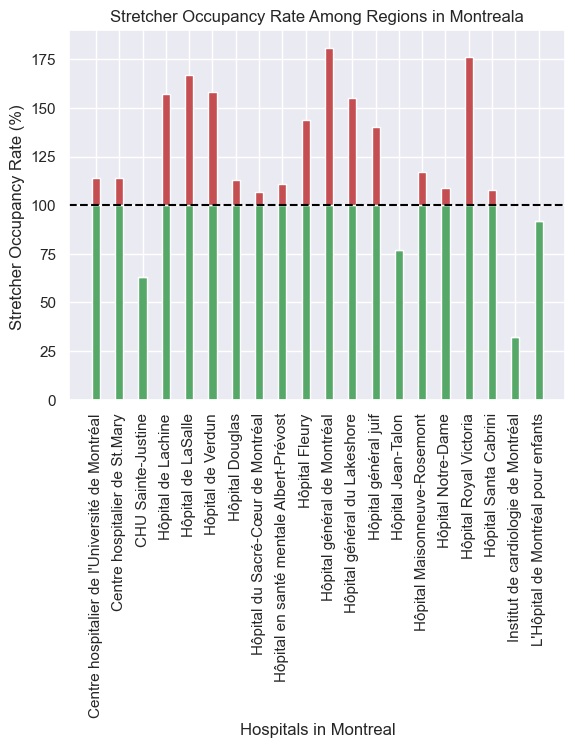

In [55]:
# set the threshold : 100(%). If occupancy rate > 100%, then means shortage.
threshold = 100
values_mtl_or = dfmtl['or_str']
x = range(len(values_mtl_or))

# split it up
above_threshold = np.maximum(values_mtl_or - threshold, 0)
below_threshold = np.minimum(values_mtl_or, threshold)

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

# horizontal line indicating the threshold

plt.title("Stretcher Occupancy Rate Among Regions in Montreala")
plt.xlabel("Hospitals in Montreal" )
plt.ylabel("Stretcher Occupancy Rate (%) ")

plt.axhline(y=100, color='black', linestyle='--', xmin=0, xmax=1)

plt.xticks(ticks=x, labels = dfmtl['name'], rotation=90)

plt.show()

### Q4. Overall Pictures Showing Estimated Emergency Wait Time of Hospitals Across Quebec

#### Plot 1

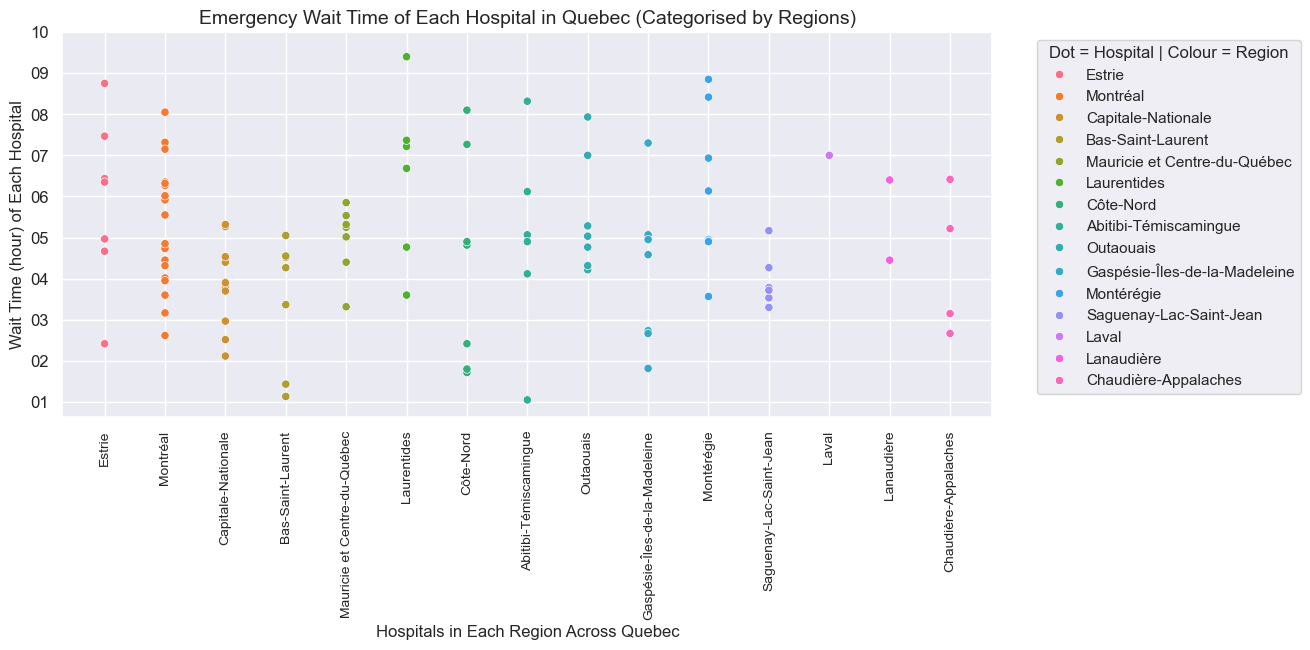

In [58]:
# Group waiting time by region for use as a label later
region_groups = df.groupby('region')['avr_wt_wrm']

average_waittime = [group for _, group in region_groups]

sns.set_theme()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

sns.scatterplot(df, x='region', y='avr_wt_wrm',color='skyblue', hue="region") # Customize boxplot
plt.title('Emergency Wait Time of Each Hospital in Quebec (Categorised by Regions)', fontsize=14) # Add title
plt.xlabel('Hospitals in Each Region Across Quebec') # Add x-axis label
plt.ylabel('Wait Time (hour) of Each Hospital') # Add y-axis label

# Adjusting ytick
ytick_values = np.arange(60, 601, 60) 
ytick_labels = [convert_hhmm(tick) for tick in ytick_values]
plt.yticks(ticks=ytick_values, labels=ytick_labels, size=12)

# Adjusting xtick
plt.xticks(size = 10, rotation=90)

plt.legend(title='Dot = Hospital | Colour = Region', bbox_to_anchor=(1.04, 1))
plt.grid(True) # Add grid lines

#### Plot 2

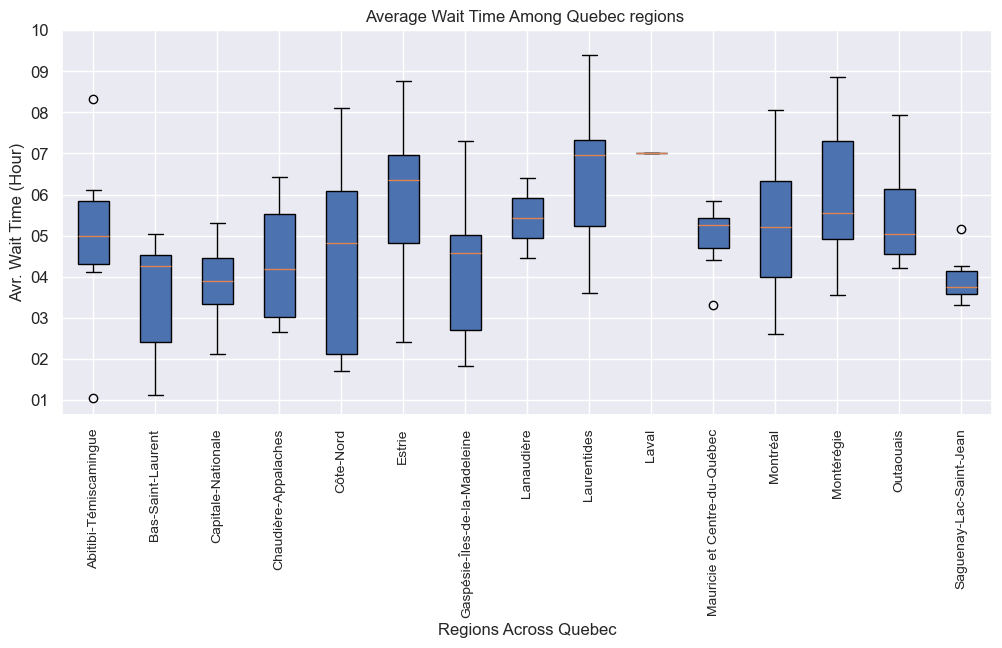

In [60]:
# Group waiting time by region for use as a label later
region_groups = df.groupby('region')['avr_wt_wrm']

average_waittime = [group for _, group in region_groups]

plt.figure(figsize=(12, 5))

plt.boxplot(average_waittime, labels=region_groups.groups.keys(), patch_artist=True)
plt.title('Average Wait Time Among Quebec regions ') # Add title
plt.xlabel('Regions Across Quebec') # Add x-axis label
plt.ylabel('Avr. Wait Time (Hour)') # Add y-axis label

# Adjusting ytick
ytick_values = np.arange(60, 601, 60) 
ytick_labels = [convert_hhmm(tick) for tick in ytick_values]
plt.yticks(ticks=ytick_values, labels=ytick_labels, size=12)

# Adjusting xtick
plt.xticks(size = 10, rotation=90)

plt.grid(True) # Add grid lines

### Q5. Does Montreal have the shortest average estimated emergency wait time among all regions in Quebec?

In [62]:
# Group by regions and find the mean values of the data, and create a new dataframe
regdf= df.groupby('region').mean(numeric_only=True).reset_index()
regdf

,region,wt_nonpri,pp_dr,pp_em,or_str,avr_wt_wrm,avr_wt_str
0,Abitibi-Témiscamingue,202.333333,8.833333,13.833333,60.833333,295.666667,295.666667
1,Bas-Saint-Laurent,95.571429,2.000000,7.857143,40.857143,208.428571,208.428571
2,Capitale-Nationale,225.181818,8.090909,27.545455,79.545455,231.363636,231.363636
3,Chaudière-Appalaches,214.750000,10.250000,38.000000,105.25,261.750000,261.750000
4,Côte-Nord,158.571429,4.714286,11.428571,61.857143,265.857143,265.857143
5,Estrie,355.857143,15.000000,32.285714,74.428571,351.857143,351.857143
6,Gaspésie-Îles-de-la-Madeleine,73.714286,0.571429,5.857143,56.428571,249.571429,249.571429
7,Lanaudière,570.000000,44.500000,108.000000,135.0,325.500000,325.500000
8,Laurentides,346.500000,15.666667,44.833333,100.5,390.333333,390.333333
9,Laval,595.000000,49.000000,130.000000,161.0,420.000000,420.000000


In [63]:
regdf = regdf.sort_values(by='avr_wt_wrm').reset_index(drop=True)
regdf 

,region,wt_nonpri,pp_dr,pp_em,or_str,avr_wt_wrm,avr_wt_str
0,Bas-Saint-Laurent,95.571429,2.000000,7.857143,40.857143,208.428571,208.428571
1,Capitale-Nationale,225.181818,8.090909,27.545455,79.545455,231.363636,231.363636
2,Saguenay-Lac-Saint-Jean,148.500000,4.666667,21.000000,52.666667,237.666667,237.666667
3,Gaspésie-Îles-de-la-Madeleine,73.714286,0.571429,5.857143,56.428571,249.571429,249.571429
4,Chaudière-Appalaches,214.750000,10.250000,38.000000,105.25,261.750000,261.750000
5,Côte-Nord,158.571429,4.714286,11.428571,61.857143,265.857143,265.857143
6,Abitibi-Témiscamingue,202.333333,8.833333,13.833333,60.833333,295.666667,295.666667
7,Mauricie et Centre-du-Québec,369.428571,15.285714,29.714286,89.714286,297.285714,297.285714
8,Montréal,351.600000,17.900000,55.200000,121.75,317.650000,317.650000
9,Lanaudière,570.000000,44.500000,108.000000,135.0,325.500000,325.500000


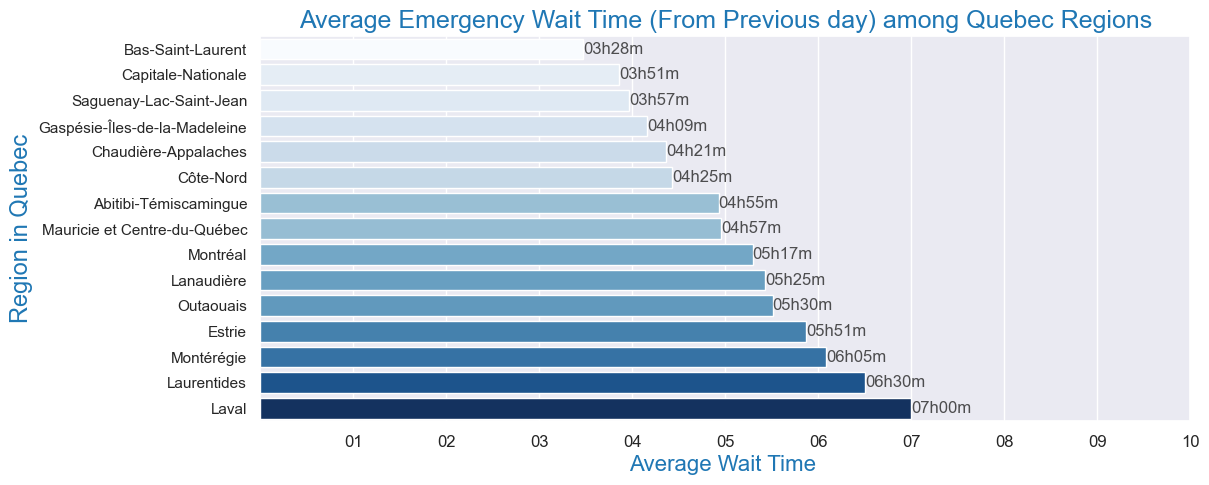

In [64]:
sns.set_theme()
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")
ax = sns.barplot(regdf, x="avr_wt_wrm", y="region", hue="avr_wt_wrm", palette="Blues")

plt.title("Average Emergency Wait Time (From Previous day) among Quebec Regions", fontsize=18, color='tab:blue')
plt.xlabel("Average Wait Time ", fontsize=16, color='tab:blue')
plt.ylabel("Region in Quebec", fontsize=17, color='tab:blue')
plt.yticks(size = 11)
ax.legend_.remove()

xtick_values = np.arange(60, 601, 60) 
xtick_labels = [convert_hhmm(tick) for tick in xtick_values]
plt.xticks(ticks=xtick_values, labels=xtick_labels, size=12)

for container in ax.containers:
    hhmm_lbl = [f'{int(label // 60):02d}h{int(label % 60):02d}m' for label in container.datavalues]
    ax.bar_label(container, labels=hhmm_lbl, fontsize=12, alpha=0.8)

plt.show()


## Step 6: Data Analysis Result

Based on the data analysis on October 3, 2024 :

1. Top 10 Hospitals with Shortest Estimated Emergergy Wait Time (Non-Priority Cases) in Montreal:
   > - Hôpital en santé mentale Albert-Prévost
   > - Hôpital Douglas
   > - Hôpital général de Montréal
   > - Hôpital de LaSalle
   > - Institut de cardiologie de Montréal
   > - Centre hospitalier de St.Mary
   > - CHU Sainte-Justine
   > - Hôpital général du Lakeshore
   > - L'Hôpital de Montréal pour enfants
   > - Hôpital de Verdun

2. Top 10 Hospitals with Shortest Average Emergergy Wait Time in Montreal:
   > - Hôpital général juif
   > - Hôpital Jean-Talon
   > - Hôpital Fleury
   > - Institut de cardiologie de Montréal
   > - Hôpital Douglas
   > - Hôpital en santé mentale Albert-Prévost
   > - L'Hôpital de Montréal pour enfants
   > - Centre hospitalier de St.Mary
   > - Hôpital de Verdun
   > - Hôpital général de Montréal

3. Is there shortage of stretchers among hospitals in Montreal?
   >- Yes, there are 16/20 hospitals with stretchers occupancy rate exceeding 100%.

4. Overall Pictures Showing Estimated Emergency Wait Time of Hospitals Across Quebec
   >- Please refer to the above visual plots.

5. Does Montreal have the shortest average estimated emergency wait time among all regions in Quebec?
   >- No, Montreal is ranked the 10th out of 15 regions across Quebec

<br>


Last update: October 3, at 1:00 a.m (EST)